In [84]:
import pandas as pd
import numpy as np
import joblib
import scipy.stats as stats

In [85]:
data_path = "/Users/dabiyyu/Downloads/mlprocess/data/raw/CCPP/Folds5x2_pp.xlsx"
df = pd.read_excel(data_path)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [86]:
joblib.dump(df, "/Users/dabiyyu/Downloads/mlprocess/data/processed/df_raw.pkl")

['/Users/dabiyyu/Downloads/mlprocess/data/processed/df_raw.pkl']

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [88]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [89]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [90]:
# nilai PE > 480 => 1
# nilai PE < 480 => 0
df['PE'] = np.where(df['PE']>480, 1, 0)

In [91]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,0
1,25.18,62.96,1020.04,59.08,0
2,5.11,39.40,1012.16,92.14,1
3,20.86,57.32,1010.24,76.64,0
4,10.82,37.50,1009.23,96.62,0
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,0
9564,13.19,39.18,1023.67,66.78,0
9565,31.32,74.33,1012.92,36.48,0
9566,24.48,69.45,1013.86,62.39,0


In [92]:
from sklearn.model_selection import train_test_split

# define X and y
X = df.drop(["PE"], axis=1)
y = df["PE"]

# print(X.shape)
# print(y.shape)

# split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# split test-valid
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

In [93]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_valid shape:{X_valid.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_valid shape: {y_valid.shape}")

X_train shape: (5740, 4)
X_test shape: (1914, 4)
X_valid shape:(1914, 4)
y_train shape: (5740,)
y_test shape: (1914,)
y_valid shape: (1914,)


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs

In [95]:
explore_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
explore_train

,AT,V,AP,RH,PE
0,14.28,44.84,1024.84,79.09,0
1,19.30,65.59,1014.07,81.98,0
2,10.05,40.71,1015.51,84.21,0
3,9.46,41.40,1026.78,87.58,1
4,21.60,59.80,1016.90,76.59,0
...,...,...,...,...,...
5735,3.74,35.19,1018.58,98.84,1
5736,24.59,60.37,1005.31,76.81,0
5737,10.30,41.79,1021.09,49.39,0
5738,11.18,37.50,1013.32,74.32,0


In [96]:
explore_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5740 entries, 0 to 5739
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      5740 non-null   float64
 1   V       5740 non-null   float64
 2   AP      5740 non-null   float64
 3   RH      5740 non-null   float64
 4   PE      5740 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 224.3 KB


In [97]:
explore_train.skew()

AT   -0.140312
V     0.208225
AP    0.277203
RH   -0.426644
PE    2.960574
dtype: float64

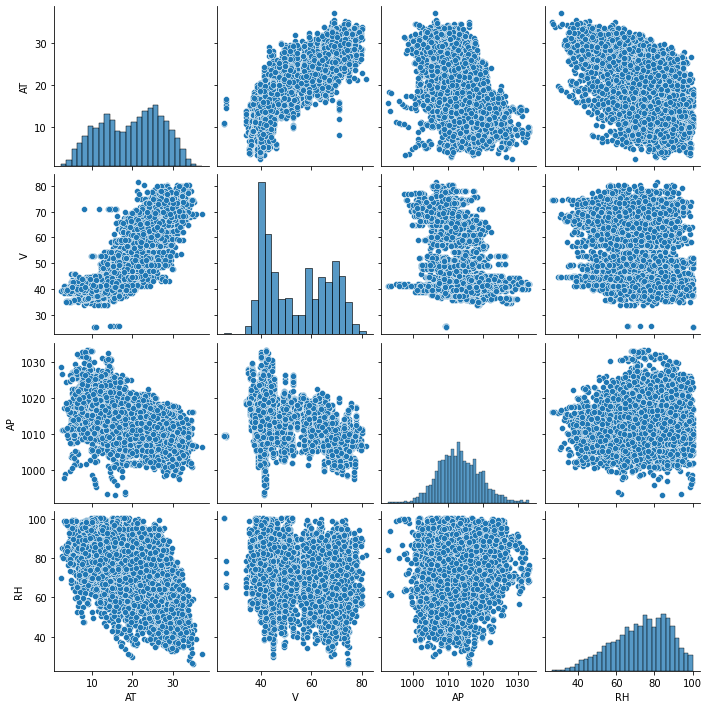

In [98]:
sns.pairplot(explore_train.drop("PE", axis=1));

In [99]:
train_corr = explore_train.drop("PE", axis=1).corr(method="pearson").abs()

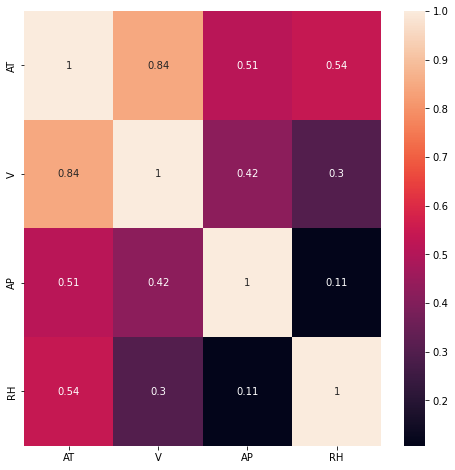

In [100]:
plt.figure(figsize=(8,8))
sns.heatmap(train_corr, annot=True)
plt.show()

In [101]:
X_train = X_train.drop('V', axis=1)
X_valid = X_valid.drop('V', axis=1)
X_test = X_test.drop('V', axis=1)

explore_train = explore_train.drop('V', axis=1)

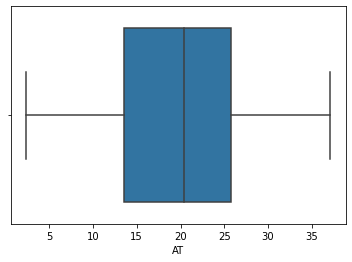

In [102]:
sns.boxplot(data=explore_train, x="AT");

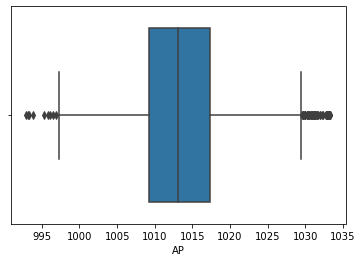

In [103]:
sns.boxplot(data=explore_train, x="AP");

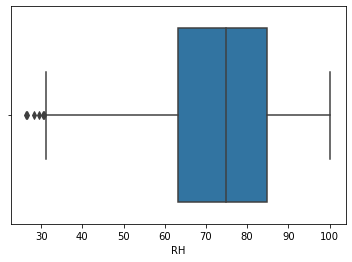

In [104]:
sns.boxplot(data=explore_train, x="RH");

In [105]:
threshold=3 #std dev

for col in explore_train.columns:
  
  if col == "PE":
    break

  z = np.abs(stats.zscore(explore_train[col]))
  out_index = np.where(z>3)
  print(col.upper())
  print(f"ada sebanyak {out_index[0].shape[0]} outlier")
  print()

AT
ada sebanyak 0 outlier

AP
ada sebanyak 32 outlier

RH
ada sebanyak 3 outlier



In [106]:
# function to handle outlier by median imputation
# jika bukand set train, isikan nama kolom pada colnames dan ubah not_train menjadi True
def handle_outlier(data, colnames=None, not_train=False):

  colnames=colnames
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)
  
  if not_train == True:
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    data = np.where(data<lwr_bound, lwr_bound, data)
    data = np.where(data>upr_bound, upr_bound, data)

  else:
    data = np.where(data<lwr_bound, lwr_bound, data)
    data = np.where(data>upr_bound, upr_bound, data)

  return data

In [107]:
for col in X_train.columns:
  X_train[col] = handle_outlier(X_train[col])

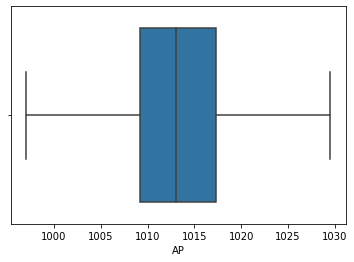

In [108]:
sns.boxplot(data=X_train, x="AP");

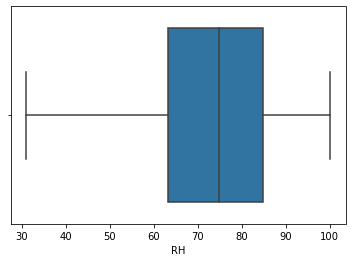

In [109]:
sns.boxplot(data=X_train, x="RH");

In [110]:
for col in X_train.columns:
  X_valid[col] = handle_outlier(X_valid[col], col, not_train=True)
  X_test[col] = handle_outlier(X_test[col], col, not_train=True)

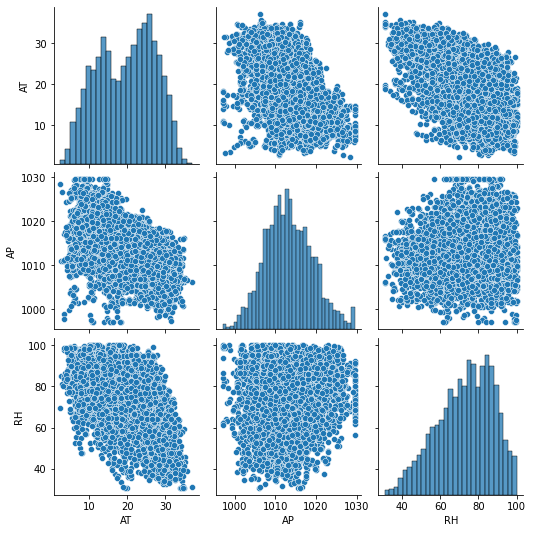

In [111]:
sns.pairplot(X_train);

In [112]:
train_corr = X_train.corr(method="pearson").abs()

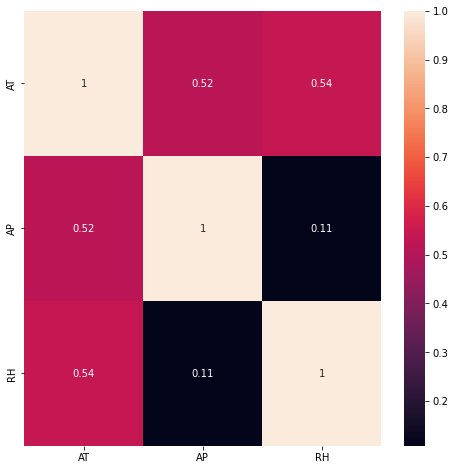

In [113]:
plt.figure(figsize=(8,8))
sns.heatmap(train_corr, annot=True)
plt.show()

In [114]:
import pingouin as pg

In [115]:
one_class = explore_train[explore_train["PE"] == 1]
zero_class = explore_train[explore_train["PE"] == 0]

In [116]:
def ttest(x):
  
  res = pg.ttest(one_class[x], zero_class[x], correction=True)
  return res

In [117]:
for col in one_class.columns:
  
  print(col.upper())
  print("-------------------------------")
  print(ttest(col))
  print()


AT
-------------------------------
                 T          dof alternative  p-val             CI95%  \
T-test -108.656017  2202.288307   two-sided    0.0  [-13.68, -13.19]   

         cohen-d BF10  power  
T-test  2.088805  inf    1.0  

AP
-------------------------------
                T         dof alternative         p-val         CI95%  \
T-test  15.388901  581.744975   two-sided  4.413711e-45  [3.77, 4.87]   

         cohen-d      BF10  power  
T-test  0.741741  6.53e+48    1.0  

RH
-------------------------------
                T         dof alternative         p-val         CI95%  \
T-test  21.094493  730.808026   two-sided  1.640250e-77  [9.1, 10.97]   

         cohen-d       BF10  power  
T-test  0.699689  2.145e+91    1.0  

PE
-------------------------------
          T  dof alternative  p-val       CI95%  cohen-d BF10 power
T-test  inf  1.0   two-sided    0.0  [nan, nan]      inf  nan   NaN



/opt/miniconda3/envs/mlprocess/lib/python3.9/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
/opt/miniconda3/envs/mlprocess/lib/python3.9/site-packages/pingouin/effsize.py:803: RuntimeWarning: divide by zero encountered in double_scalars
  d = (x.mean() - y.mean()) / poolsd
/opt/miniconda3/envs/mlprocess/lib/python3.9/site-packages/pingouin/parametric.py:275: RuntimeWarning: invalid value encountered in multiply
  ci = np.array([tval - tcrit, tval + tcrit]) * se


semua signifikan

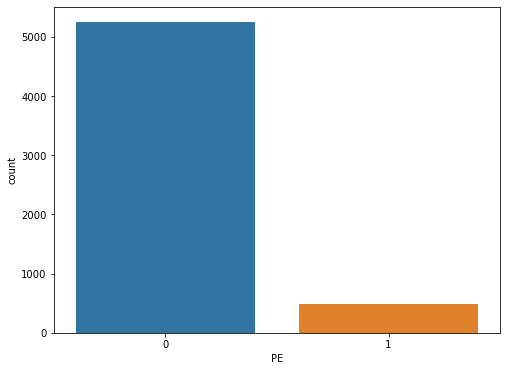

In [118]:
plt.subplots(figsize=(8,6))
sns.countplot(data=explore_train, x='PE')
plt.show()

In [119]:
print("Class ratio: 1 :", np.ceil(explore_train["PE"].value_counts()[0]/explore_train["PE"].value_counts()[1]))

Class ratio: 1 : 11.0


In [120]:
# import necessary library

from sklearn.preprocessing import StandardScaler

In [121]:
# initialize the scaler

std_scaler = StandardScaler()

In [122]:
# fit to training data

std_scaler.fit(X_train)

StandardScaler()

In [123]:
# transform training data
X_train = std_scaler.transform(X_train)

# show the results
print(X_train)

[[-7.22054350e-01  1.95777281e+00  4.07117267e-01]
 [-4.83198316e-02  1.26761096e-01  6.04958127e-01]
 [-1.28976292e+00  3.71576033e-01  7.57617337e-01]
 ...
 [-1.25621040e+00  1.32023391e+00 -1.62605697e+00]
 [-1.13810555e+00 -7.46683187e-04  8.05771621e-02]
 [ 7.30098537e-01 -5.63481016e-01  4.29023521e-01]]


In [124]:
# construct a dataframe
X_train = pd.DataFrame(X_train, columns=std_scaler.feature_names_in_)

In [125]:
# now we transform the validation and test set as well

# validation set
X_valid = std_scaler.transform(X_valid)
X_valid = pd.DataFrame(X_valid, columns=std_scaler.feature_names_in_)

# test set
X_test = std_scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=std_scaler.feature_names_in_)

In [126]:
print("X_train:", X_train.shape)
print("X_valid:", X_valid.shape)
print("X_test:", X_test.shape)

X_train: (5740, 3)
X_valid: (1914, 3)
X_test: (1914, 3)


In [127]:
joblib.dump(X_train, "/Users/dabiyyu/Downloads/mlprocess/data/processed/X_train.pkl")
joblib.dump(y_train, "/Users/dabiyyu/Downloads/mlprocess/data/processed/y_train.pkl")

joblib.dump(X_valid, "/Users/dabiyyu/Downloads/mlprocess/data/processed/X_valid.pkl")
joblib.dump(y_valid, "/Users/dabiyyu/Downloads/mlprocess/data/processed/y_valid.pkl")

joblib.dump(X_test, "/Users/dabiyyu/Downloads/mlprocess/data/processed/X_test.pkl")
joblib.dump(y_test, "/Users/dabiyyu/Downloads/mlprocess/data/processed/y_test.pkl")

['/Users/dabiyyu/Downloads/mlprocess/data/processed/y_test.pkl']

In [128]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [129]:
# prepare training set
training_set = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
training_set

,AT,AP,RH,PE
0,-0.722054,1.957773,0.407117,0
1,-0.048320,0.126761,0.604958,0
2,-1.289763,0.371576,0.757617,0
3,-1.368947,2.287593,0.988318,1
4,0.260363,0.607890,0.235975,0
...,...,...,...,...
5735,-2.136628,0.893508,1.759144,1
5736,0.661651,-1.362530,0.251035,0
5737,-1.256210,1.320234,-1.626057,0
5738,-1.138106,-0.000747,0.080577,0


In [130]:
# initialize the random sampler
rus = RandomUnderSampler(random_state=42)

In [131]:
# fit the resampler
x_rus, y_rus = rus.fit_resample(X_train, y_train.reset_index(drop=True))

/var/folders/rt/ng8d6fvj76jdty0q_ccm2b1w0000gn/T/ipykernel_15723/3256236526.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


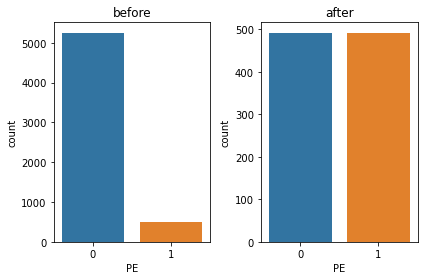

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

rus_data = pd.concat([x_rus, y_rus], axis=1)

fig, ax = plt.subplots(1, 2, figsize=(6, 4))

sns.countplot(ax=ax[0], data=training_set, x="PE")
ax[0].set_title("before")

sns.countplot(ax=ax[1], data=rus_data, x="PE")
ax[1].set_title("after")

fig.tight_layout()

fig.show()

In [133]:
# initialize SMOTE
smote = SMOTE(random_state=2)

In [134]:
# fit smote
x_sm, y_sm = smote.fit_resample(X_train, y_train.reset_index(drop=True))

/var/folders/rt/ng8d6fvj76jdty0q_ccm2b1w0000gn/T/ipykernel_15723/3340135962.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


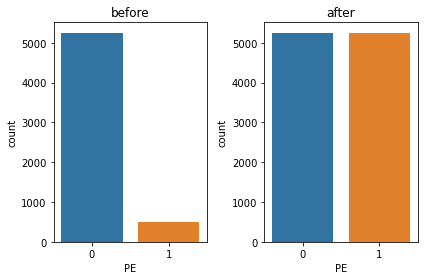

In [135]:
sm_data = pd.concat([x_sm, y_sm], axis=1)

fig, ax = plt.subplots(1, 2, figsize=(6, 4))

sns.countplot(ax=ax[0], data=training_set, x="PE")
ax[0].set_title("before")

sns.countplot(ax=ax[1], data=sm_data, x="PE")
ax[1].set_title("after")

fig.tight_layout()

fig.show()

In [136]:
import joblib

joblib.dump(x_rus, "/Users/dabiyyu/Downloads/mlprocess/data/processed/X_rus.pkl")
joblib.dump(y_rus, "/Users/dabiyyu/Downloads/mlprocess/data/processed/y_rus.pkl")

joblib.dump(x_sm, "/Users/dabiyyu/Downloads/mlprocess/data/processed/X_sm.pkl")
joblib.dump(y_sm, "/Users/dabiyyu/Downloads/mlprocess/data/processed/y_sm.pkl")

joblib.dump(X_valid, "/Users/dabiyyu/Downloads/mlprocess/data/processed/X_valid.pkl")
joblib.dump(y_valid, "/Users/dabiyyu/Downloads/mlprocess/data/processed/y_valid.pkl")

joblib.dump(X_test, "/Users/dabiyyu/Downloads/mlprocess/data/processed/X_test.pkl")
joblib.dump(y_test, "/Users/dabiyyu/Downloads/mlprocess/data/processed/y_test.pkl")

['/Users/dabiyyu/Downloads/mlprocess/data/processed/y_test.pkl']

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from datetime import datetime
from tqdm import tqdm
import yaml
import joblib
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import hashlib

/opt/miniconda3/envs/mlprocess/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [138]:
X_rus = joblib.load("/Users/dabiyyu/Downloads/mlprocess/data/processed/X_rus.pkl")
y_rus = joblib.load("/Users/dabiyyu/Downloads/mlprocess/data/processed/y_rus.pkl")

X_sm = joblib.load("/Users/dabiyyu/Downloads/mlprocess/data/processed/X_sm.pkl")
y_sm = joblib.load("/Users/dabiyyu/Downloads/mlprocess/data/processed/y_sm.pkl")

X_valid = joblib.load("/Users/dabiyyu/Downloads/mlprocess/data/processed/X_valid.pkl")
y_valid = joblib.load("/Users/dabiyyu/Downloads/mlprocess/data/processed/y_valid.pkl")

X_test = joblib.load("/Users/dabiyyu/Downloads/mlprocess/data/processed/X_test.pkl")
y_test = joblib.load("/Users/dabiyyu/Downloads/mlprocess/data/processed/y_test.pkl")

In [139]:
def time_stamp():
    return datetime.now()

In [142]:
def create_log_template():
    logger = {
        "model_name" : [],
        "model_uid" : [],
        "training_time" : [],
        "training_date" : [],
        "performance" : [],
        "f1_score_avg" : [],
        "data_configurations" : [],
    }

    return logger

In [141]:
def training_log_updater(current_log, log_path):
    current_log = current_log.copy()

    try:
        with open(log_path, "r") as file:
            last_log = json.load(file)
        file.close()
    except FileNotFoundError as ffe:
        with open(log_path, "w") as file:
            file.write("[]")
        file.close()
        with open(log_path, "r") as file:
            last_log = json.load(file)
        file.close()
    
    last_log.append(current_log)

    with open(log_path, "w") as file:
        json.dump(last_log, file)
        file.close()

    return last_log

In [143]:
lgr_baseline = LogisticRegression()
dct_baseline = DecisionTreeClassifier()
rfc_baseline = RandomForestClassifier()
knn_baseline = KNeighborsClassifier()
xgb_baseline = XGBClassifier()

In [144]:
list_of_model = {
    "undersampling" : [
        { "model_name": lgr_baseline.__class__.__name__, "model_object": lgr_baseline, "model_uid": ""},
        { "model_name": dct_baseline.__class__.__name__, "model_object": dct_baseline, "model_uid": ""},
        { "model_name": rfc_baseline.__class__.__name__, "model_object": rfc_baseline, "model_uid": ""},
        { "model_name": knn_baseline.__class__.__name__, "model_object": knn_baseline, "model_uid": ""},
        { "model_name": xgb_baseline.__class__.__name__, "model_object": xgb_baseline, "model_uid": ""}
        ],
    "smote" : [
        { "model_name": lgr_baseline.__class__.__name__, "model_object": lgr_baseline, "model_uid": ""},
        { "model_name": dct_baseline.__class__.__name__, "model_object": dct_baseline, "model_uid": ""},
        { "model_name": rfc_baseline.__class__.__name__, "model_object": rfc_baseline, "model_uid": ""},
        { "model_name": knn_baseline.__class__.__name__, "model_object": knn_baseline, "model_uid": ""},
        { "model_name": xgb_baseline.__class__.__name__, "model_object": xgb_baseline, "model_uid": ""}
        ],
    }

In [145]:
def train_eval_model(list_of_model, prefix_model_name, x_train, y_train, data_configuration_name, x_valid, y_valid, log_path):

    list_of_model = copy.deepcopy(list_of_model)
    logger = create_log_template()

    for model in tqdm(list_of_model):    
        model_name = prefix_model_name + "-" + model["model_name"]

        start_time = time_stamp()
        model["model_object"].fit(x_train, y_train)
        finished_time = time_stamp()

        elapsed_time = finished_time - start_time
        elapsed_time = elapsed_time.total_seconds()

        y_pred = model["model_object"].predict(x_valid)
        performance = classification_report(y_valid, y_pred, output_dict = True)

        plain_id = str(start_time) + str(finished_time)
        chiper_id = hashlib.md5(plain_id.encode()).hexdigest()

        model["model_uid"] = chiper_id

        logger["model_name"].append(model_name)
        logger["model_uid"].append(chiper_id)
        logger["training_time"].append(elapsed_time)
        logger["training_date"].append(str(start_time))
        logger["performance"].append(performance)
        logger["f1_score_avg"].append(performance["macro avg"]["f1-score"])
        logger["data_configurations"].append(data_configuration_name)

    training_log = training_log_updater(logger, log_path)

    return training_log, list_of_model

In [146]:
training_log, list_of_model_rus = train_eval_model(
    list_of_model["undersampling"],
    "baseline_model",
    X_rus,
    y_rus,
    "undersampling",
    X_valid,
    y_valid,
    "/Users/dabiyyu/Downloads/mlprocess/log/training_log.json"
)

 80%|████████  | 4/5 [00:00<00:00,  4.87it/s]/opt/miniconda3/envs/mlprocess/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/mlprocess/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:45:11] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 5/5 [00:01<00:00,  3.99it/s]


In [147]:
list_of_model["undersampling"] = copy.deepcopy(list_of_model_rus)

In [148]:
training_log, list_of_model_sm = train_eval_model(
    list_of_model["smote"],
    "baseline_model",
    X_sm,
    y_sm,
    "smote",
    X_valid,
    y_valid,
     "/Users/dabiyyu/Downloads/mlprocess/log/training_log.json"
)

 80%|████████  | 4/5 [00:02<00:00,  1.84it/s]/opt/miniconda3/envs/mlprocess/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/mlprocess/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:46:08] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


In [149]:
list_of_model["smote"] = copy.deepcopy(list_of_model_sm)

In [150]:
def training_log_to_df(training_log):
    training_res = pd.DataFrame()

    for log in tqdm(training_log):
        training_res = pd.concat([training_res, pd.DataFrame(log)])
    
    training_res.sort_values(["f1_score_avg", "training_time"], ascending = [False, True], inplace = True)
    training_res.reset_index(inplace = True, drop = True)
    
    return training_res

In [151]:
training_res = training_log_to_df(training_log)

100%|██████████| 8/8 [00:00<00:00, 171.37it/s]


In [152]:
training_res

,model_name,model_uid,training_time,training_date,performance,data_configurations,f1_score_avg
0,baseline_model-XGBClassifier,e446e67ed82b924acb746a6655a05ae0,1.749198,2022-11-22 21:46:08.360615,"{'0': {'precision': 0.9934872705743043, 'recal...",smote,0.881249
1,baseline_model-RandomForestClassifier,d1e580c845cd9e710b2855526717b8a0,1.687939,2022-11-22 21:46:06.435072,"{'0': {'precision': 0.9928909952606635, 'recal...",smote,0.877236
2,baseline_model-KNeighborsClassifier,3ee959b81d158c8611da2a3c9d7d161f,0.011857,2022-11-22 21:46:08.176975,"{'0': {'precision': 0.9946332737030411, 'recal...",smote,0.873257
3,baseline_model-DecisionTreeClassifier,4d02546917536fdf52601034eb71e3d3,0.050719,2022-11-22 21:46:06.369611,"{'0': {'precision': 0.9882491186839013, 'recal...",smote,0.870232
4,baseline_model-DecisionTreeClassifier,59b4dd1702a3798645cc1e4178080d36,0.006037,2022-11-22 21:45:10.607943,"{'0': {'precision': 0.9963592233009708, 'recal...",undersampling,0.850667
5,baseline_model-RandomForestClassifier,c758bc316cd5acabc6e47352e71b608e,0.272851,2022-11-22 21:45:10.634386,"{'0': {'precision': 1.0, 'recall': 0.932571428...",undersampling,0.850268
6,baseline_model-LogisticRegression,afcc0a4f74a14963b06cd2eb1a1f9aa5,0.224275,2022-11-22 21:46:06.127839,"{'0': {'precision': 0.9987775061124694, 'recal...",smote,0.849091
7,baseline_model-XGBClassifier,8e0f33e6fa3851bb745e52b109c29e8b,0.422067,2022-11-22 21:45:11.192742,"{'0': {'precision': 0.9969362745098039, 'recal...",undersampling,0.837579
8,baseline_model-LogisticRegression,df3db290fc236dba9a8a6a2d61c843a5,0.204844,2022-11-22 21:45:10.382696,"{'0': {'precision': 1.0, 'recall': 0.915428571...",undersampling,0.822461
9,baseline_model-KNeighborsClassifier,dd72709319a7f8f0bdaa48152682c41a,0.002545,2022-11-22 21:45:10.946283,"{'0': {'precision': 0.9981191222570532, 'recal...",undersampling,0.809268


In [153]:
def get_best_model(training_log_df, list_of_model):
    model_object = None

    best_model_info = training_log_df.sort_values(["f1_score_avg", "training_time"], ascending = [False, True]).iloc[0]
    
    for configuration_data in list_of_model:
        for model_data in list_of_model[configuration_data]:
            if model_data["model_uid"] == best_model_info["model_uid"]:
                model_object = model_data["model_object"]
                break
    
    if model_object == None:
        raise RuntimeError("The best model not found in your list of model.")
    
    return model_object

In [154]:
model = get_best_model(training_res, list_of_model)

In [155]:
joblib.dump(model, "/Users/dabiyyu/Downloads/mlprocess/models/model.pkl")

['/Users/dabiyyu/Downloads/mlprocess/models/model.pkl']

In [64]:
# dist_params_rfr = {
    # 'max_depth' : range(5,50,5),
    # 'min_samples_split' : range(5,50,5),
    # 'max_leaf_nodes' : range(5,50,5),
    # 'min_samples_leaf' : range(50,5000,500),
    # 'n_estimators' : range(50,500,50),
    # 'max_samples' : [0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_features' : [1,2,3]
# }

In [156]:
dist_params_knn = {
    "algorithm" : ["ball_tree", "kd_tree", "brute"],
    "n_neighbors" : [2, 3, 4, 5, 6, 10, 15, 20, 25],
    "leaf_size" : [2, 3, 4, 5, 6, 10, 15, 20, 25],
}

In [157]:
knn_enh = GridSearchCV(KNeighborsClassifier(), dist_params_knn, n_jobs = -1, verbose = 420)

In [158]:
list_of_model["undersampling"].append({"model_name": knn_enh.__class__.__name__ + "-" + knn_enh.estimator.__class__.__name__, "model_object": copy.deepcopy(knn_enh), "model_uid": ""})
list_of_model["smote"].append({"model_name": knn_enh.__class__.__name__ + "-" + knn_enh.estimator.__class__.__name__, "model_object": copy.deepcopy(knn_enh), "model_uid": ""})

In [160]:
training_log, list_of_model_rus_hyp = train_eval_model(
    [list_of_model["undersampling"][-1]],
    "hyperparams",
    X_rus,
    y_rus,
    "undersampling",
    X_valid,
    y_valid,
    "/Users/dabiyyu/Downloads/mlprocess/log/training_log.json"
    )

  0%|          | 0/1 [00:00<?, ?it/s]

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5; 1/243] START algorithm=ball_tree, leaf_size=2, n_neighbors=2...........
[CV 2/5; 1/243] START algorithm=ball_tree, leaf_size=2, n_neighbors=2...........
[CV 3/5; 1/243] START algorithm=ball_tree, leaf_size=2, n_neighbors=2...........
[CV 4/5; 1/243] START algorithm=ball_tree, leaf_size=2, n_neighbors=2...........
[CV 2/5; 1/243] END algorithm=ball_tree, leaf_size=2, n_neighbors=2;, score=0.949 total time=   0.1s
[CV 3/5; 1/243] END algorithm=ball_tree, leaf_size=2, n_neighbors=2;, score=0.924 total time=   0.1s
[CV 1/5; 1/243] END algorithm=ball_tree, leaf_size=2, n_neighbors=2;, score=0.944 total time=   0.2s
[CV 4/5; 1/243] END algorithm=ball_tree, leaf_size=2, n_neighbors=2;, score=0.939 total time=   0.1s
[CV 5/5; 1/243] START algorithm=ball_tree, leaf_size=2, n_neighbors=2...........
[CV 1/5; 2/243] START algorithm=ball_tree, leaf_size=2, n_neighbors=3...........
[CV 2/5; 2/243] START algorithm=ball_tree, lea

100%|██████████| 1/1 [00:50<00:00, 50.47s/it]

[CV 2/5; 243/243] END algorithm=brute, leaf_size=25, n_neighbors=25;, score=0.959 total time=   0.1s
[CV 5/5; 243/243] END algorithm=brute, leaf_size=25, n_neighbors=25;, score=0.969 total time=   0.1s


In [161]:
list_of_model["undersampling"][-1] = copy.deepcopy(list_of_model_rus_hyp[0])

In [162]:
list_of_model["undersampling"][-1]

{'model_name': 'GridSearchCV-KNeighborsClassifier',
 'model_object': GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
              param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'leaf_size': [2, 3, 4, 5, 6, 10, 15, 20, 25],
                          'n_neighbors': [2, 3, 4, 5, 6, 10, 15, 20, 25]},
              verbose=420),
 'model_uid': '2ee2d4d7bf95636a567f3da90944fe4b'}

In [163]:
training_log_to_df(training_log)

100%|██████████| 9/9 [00:00<00:00, 332.94it/s]


,model_name,model_uid,training_time,training_date,performance,data_configurations,f1_score_avg
0,baseline_model-XGBClassifier,e446e67ed82b924acb746a6655a05ae0,1.749198,2022-11-22 21:46:08.360615,"{'0': {'precision': 0.9934872705743043, 'recal...",smote,0.881249
1,baseline_model-RandomForestClassifier,d1e580c845cd9e710b2855526717b8a0,1.687939,2022-11-22 21:46:06.435072,"{'0': {'precision': 0.9928909952606635, 'recal...",smote,0.877236
2,baseline_model-KNeighborsClassifier,3ee959b81d158c8611da2a3c9d7d161f,0.011857,2022-11-22 21:46:08.176975,"{'0': {'precision': 0.9946332737030411, 'recal...",smote,0.873257
3,baseline_model-DecisionTreeClassifier,4d02546917536fdf52601034eb71e3d3,0.050719,2022-11-22 21:46:06.369611,"{'0': {'precision': 0.9882491186839013, 'recal...",smote,0.870232
4,baseline_model-DecisionTreeClassifier,59b4dd1702a3798645cc1e4178080d36,0.006037,2022-11-22 21:45:10.607943,"{'0': {'precision': 0.9963592233009708, 'recal...",undersampling,0.850667
5,baseline_model-RandomForestClassifier,c758bc316cd5acabc6e47352e71b608e,0.272851,2022-11-22 21:45:10.634386,"{'0': {'precision': 1.0, 'recall': 0.932571428...",undersampling,0.850268
6,baseline_model-LogisticRegression,afcc0a4f74a14963b06cd2eb1a1f9aa5,0.224275,2022-11-22 21:46:06.127839,"{'0': {'precision': 0.9987775061124694, 'recal...",smote,0.849091
7,baseline_model-XGBClassifier,8e0f33e6fa3851bb745e52b109c29e8b,0.422067,2022-11-22 21:45:11.192742,"{'0': {'precision': 0.9969362745098039, 'recal...",undersampling,0.837579
8,baseline_model-LogisticRegression,df3db290fc236dba9a8a6a2d61c843a5,0.204844,2022-11-22 21:45:10.382696,"{'0': {'precision': 1.0, 'recall': 0.915428571...",undersampling,0.822461
9,hyperparams-GridSearchCV-KNeighborsClassifier,2ee2d4d7bf95636a567f3da90944fe4b,50.351878,2022-11-22 21:50:53.715115,"{'0': {'precision': 0.9987492182614134, 'recal...",undersampling,0.815063


In [165]:
y_pred = model.predict(X_valid)

In [73]:
mean_squared_error(y_valid, y_pred)

0.05622227724982202

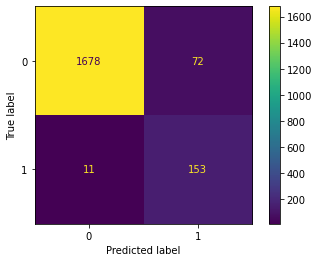

In [166]:
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred)